In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Get load
df = pd.read_excel(os.getcwd()+'/data/gridworks_yearly_data.xlsx', header=3, index_col = 0)
df.index = pd.to_datetime(df.index)
df.index.name = None
df['load'] = df['House Power Required AvgKw']
df = df.loc[:, ['load']]
df.head()

,load
2022-01-01 00:00:00,5.91
2022-01-01 01:00:00,5.77
2022-01-01 02:00:00,5.67
2022-01-01 03:00:00,5.77
2022-01-01 04:00:00,5.71


In [2]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df.index.month.map(get_season)
df.index = df.index.round('H')

In [3]:
spring, summer, fall, winter = [], [], [], []
for i in range(24):
    spring.append(np.median(list(df[(df['season']=='Spring') & (df.index.hour == i)].load)))
    summer.append(np.median(list(df[(df['season']=='Summer') & (df.index.hour == i)].load)))
    fall.append(np.median(list(df[(df['season']=='Autumn') & (df.index.hour == i)].load)))
    winter.append(np.median(list(df[(df['season']=='Winter') & (df.index.hour == i)].load)))

months = {}
for j in range(1,13):
    months[f'month{j}'] = []
    for i in range(24):
        months[f'month{j}'].append(np.median(list(df[(df.index.month==j) & (df.index.hour == i)].load)))

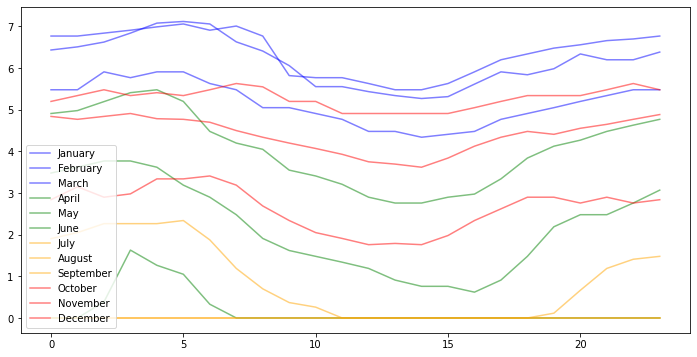

In [4]:
def month(j):
    if j==1: return "January"
    if j==2: return "February"
    if j==3: return "March"
    if j==4: return "April"
    if j==5: return "May"
    if j==6: return "June"
    if j==7: return "July"
    if j==8: return "August"
    if j==9: return "September"
    if j==10: return "October"
    if j==11: return "November"
    if j==12: return "December"

plt.figure(figsize=(12,6))
for j in range(1,13):
    if j<4: color='blue'
    elif j<7: color='green'
    elif j<10: color='orange'
    else: color='red'
    plt.plot(months[f'month{j}'], color=color, label=month(j), alpha=0.5)
#plt.ylim([0,15])
plt.legend()
plt.show()

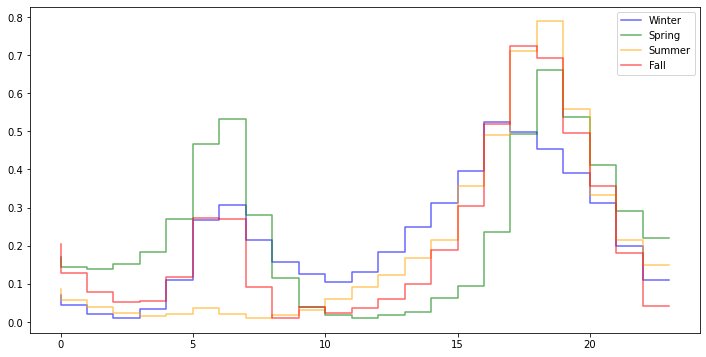

In [5]:
prices_by_season = {
    'WinterHDP': [0.0718, 0.0445, 0.0202, 0.011, 0.0331, 0.11, 0.2672, 0.3077, 0.2163, 0.1584, 0.1264, 0.1047, 0.1318, 0.1835, 0.2485, 0.3123, 0.3961, 0.5254, 0.4974, 0.4525, 0.3918, 0.3113, 0.1998, 0.1106], 
    'SpringHDP': [0.1714, 0.144, 0.1385, 0.1518, 0.1829, 0.2713, 0.4659, 0.5328, 0.28, 0.1158, 0.0398, 0.0196, 0.011, 0.0188, 0.0255, 0.0632, 0.0957, 0.2358, 0.4931, 0.6618, 0.5364, 0.4116, 0.2905, 0.2209], 
    'SummerHDP': [0.0864, 0.0587, 0.0385, 0.0246, 0.0165, 0.0215, 0.0359, 0.0206, 0.0106, 0.0192, 0.0309, 0.0612, 0.0925, 0.1244, 0.1667, 0.2148, 0.3563, 0.4893, 0.7098, 0.7882, 0.5586, 0.3326, 0.2152, 0.1487], 
    'FallHDP': [0.2052, 0.1284, 0.0792, 0.0531, 0.0551, 0.1193, 0.2737, 0.27, 0.0916, 0.011, 0.0389, 0.0238, 0.0366, 0.0611, 0.0998, 0.1888, 0.3046, 0.5198, 0.7248, 0.6936, 0.4961, 0.3569, 0.1822, 0.0413]
}

seasons = ['WinterHDP', 'SpringHDP', 'SummerHDP', 'FallHDP']

plt.figure(figsize=(12,6))
for season in seasons:
    if season=="WinterHDP": color='blue'
    elif season=="SpringHDP": color='green'
    elif season=="SummerHDP": color='orange'
    else: color='red'
    plt.step(range(24), prices_by_season[season], label=season[:-3], color=color, alpha=0.6)
plt.legend()
plt.show()

In [6]:
# For every month, get typical day, get cost of optimal operation with duplicate as horizon
# Sum all costs => yearly OPEX estimation

In [ ]:
def get_OPEX():
    for i in range(1,13):
        opex += run_optimal(month=i, price=price_type)
    opex = opex/365